# Feature = 장애인수비율, 화재발생건수비율, 금융기관개수비율, 노인복지시설개수비율, 전입&전출

# Target = 독거노인수


## 서울시 2012년 '동' 별 자료 참고

  ### *모든 Feature 들은 '동'의 인구로 나눠 비율로 바꿔 회귀분석 실시
  ### * 장애인수비율, 노인복지시설비율에 누락된 sample 값들은 해당 feature의 평균값으로 기입.  

In [8]:
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from pandas.io.pytables import IndexCol
from pandas.core.frame import DataFrame
from requests.api import head
from sklearn.linear_model.base import LinearRegression
from sklearn import svm
from numpy import newaxis
from pip.req.req_file import preprocess
from mistune import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
import statsmodels.api as sm
sns.set()

In [44]:
import numpy as np
from sklearn.cross_validation import cross_val_score

In [10]:
raw_data = pd.read_csv('raw_data_ratio.csv', header=0, encoding='cp949')

In [11]:
x = pd.DataFrame(raw_data, columns=['seniorcenterratio', 'bankratio', 'movinginratio', 'movingoutratio', 'disableratio','fireratio'])

In [12]:
y = pd.DataFrame(raw_data, columns=['older'])

In [13]:
x_scale = pd.DataFrame(scale(x), index = x.index, columns = x.columns)

In [14]:
df = pd.concat([x_scale,y],axis=1)

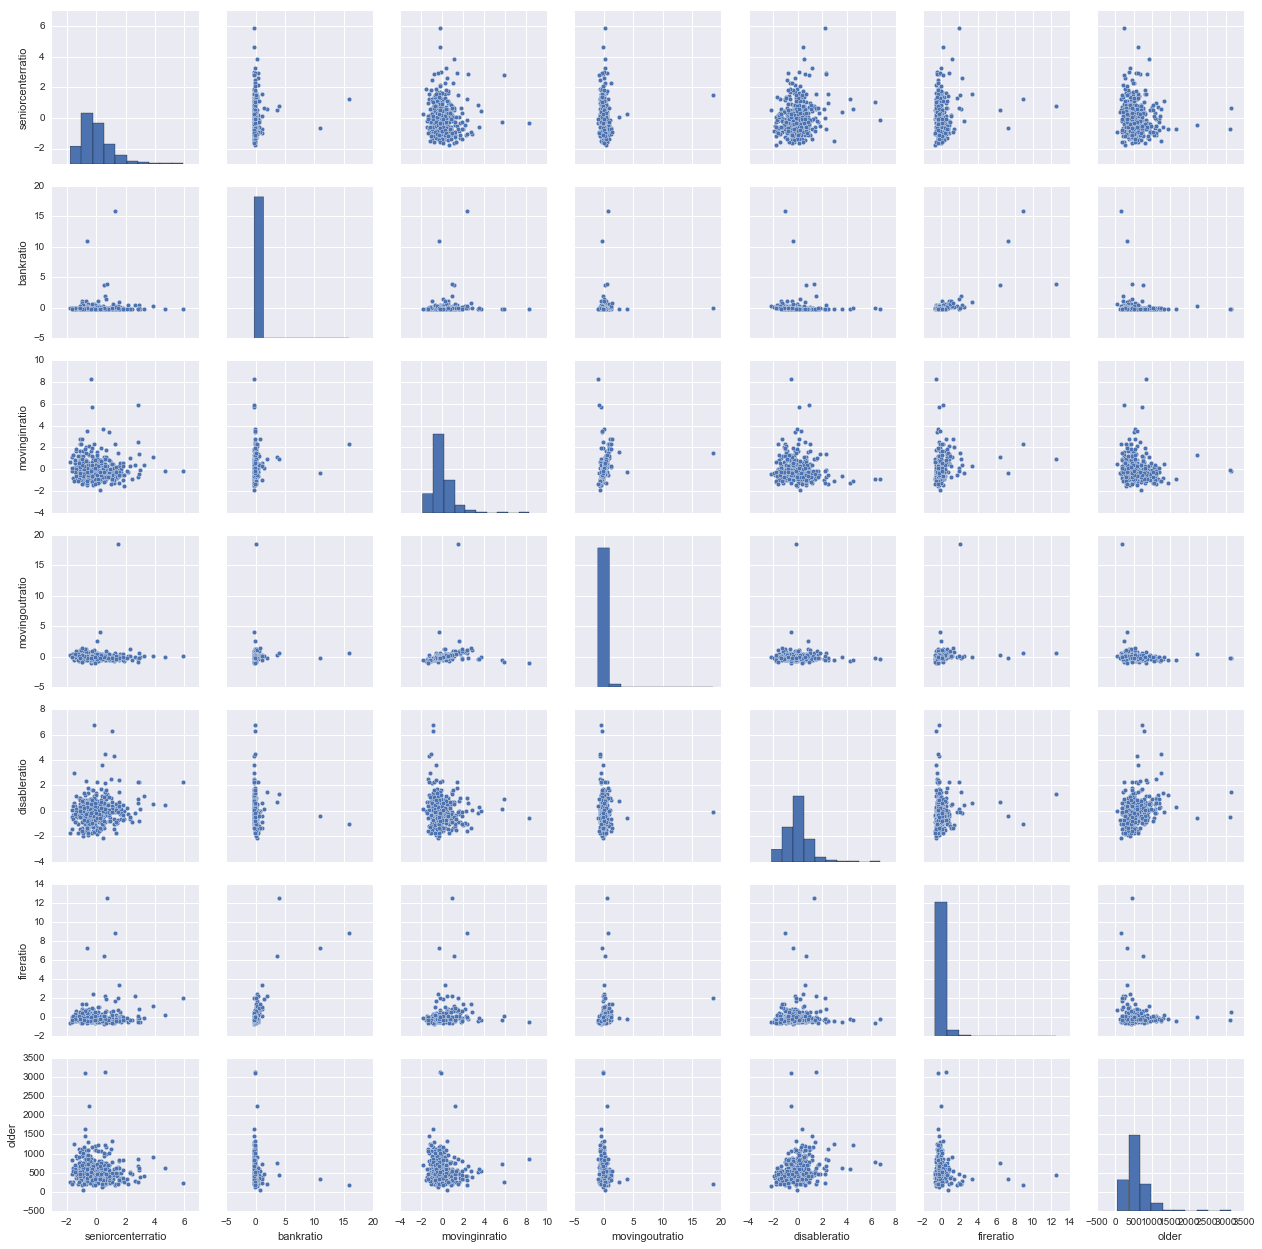

In [15]:
sns.pairplot(df)

In [16]:
x_scale_norm = pd.DataFrame(normalize(x_scale), index = x.index, columns = x.columns)

In [17]:
df1 = pd.concat([x_scale_norm,y],axis=1)

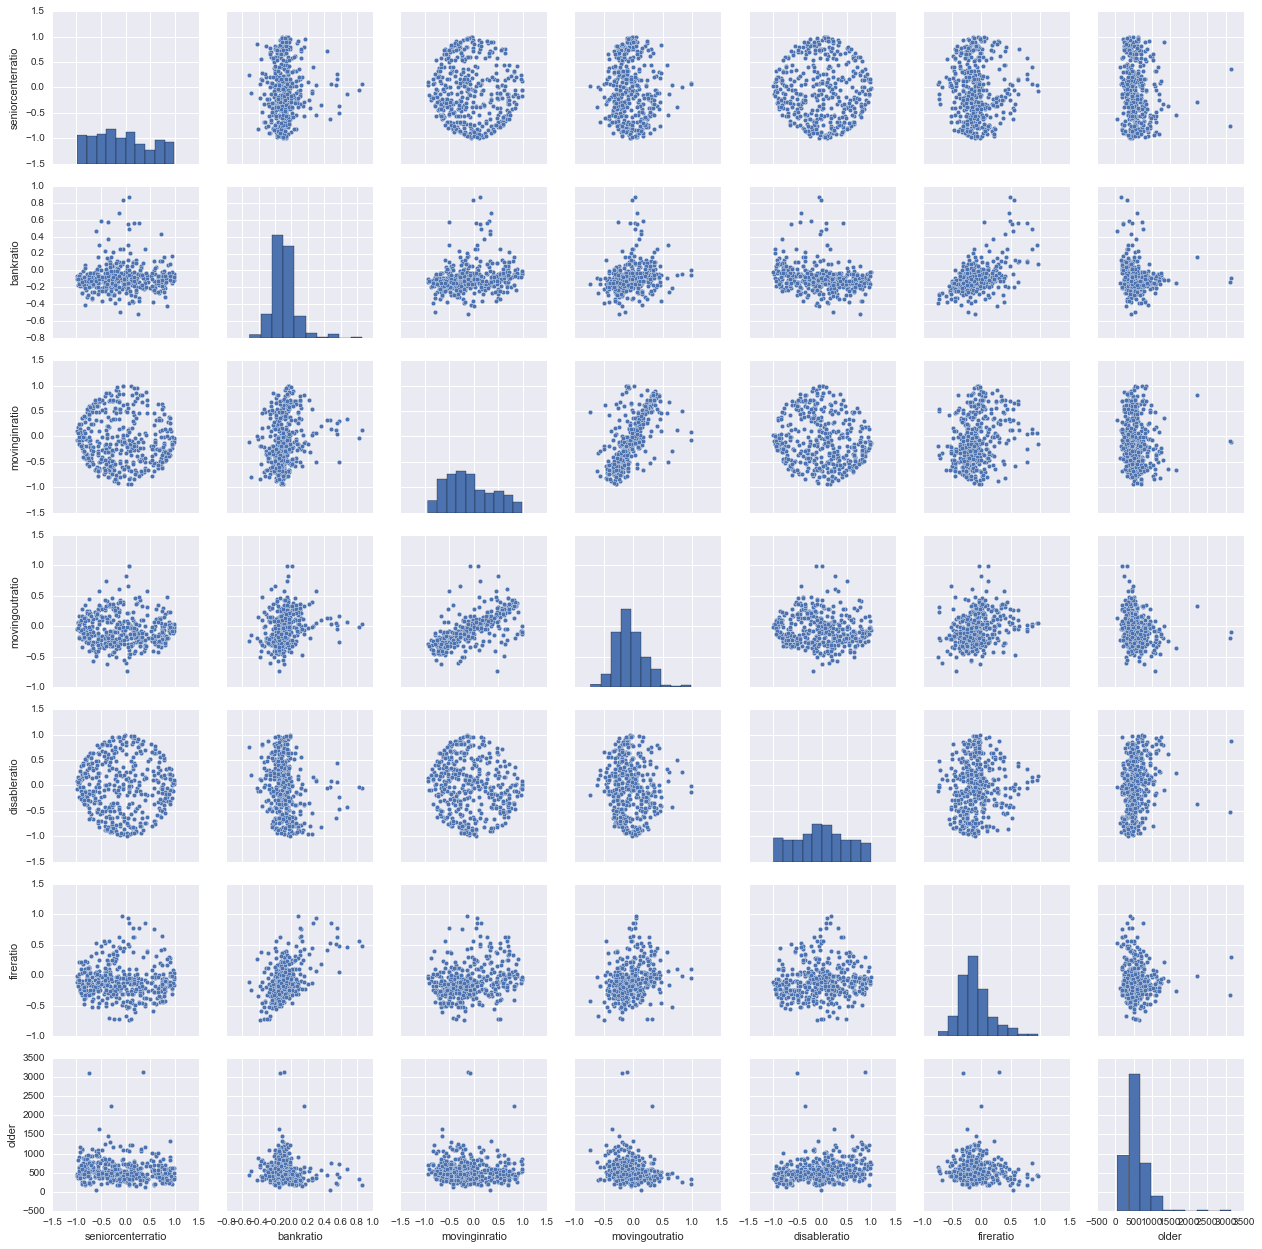

In [18]:
sns.pairplot(df1)

In [19]:
model_OLS = sm.OLS(y,x_scale_norm) 
result_OLS = model_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     23.85
Date:                Wed, 24 Feb 2016   Prob (F-statistic):           2.87e-24
Time:                        20:52:24   Log-Likelihood:                -3273.1
No. Observations:                 423   AIC:                             6558.
Df Residuals:                     417   BIC:                             6582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
seniorcenterratio  -163.1606     48.81

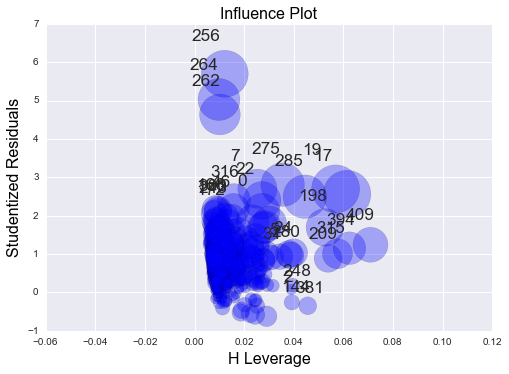

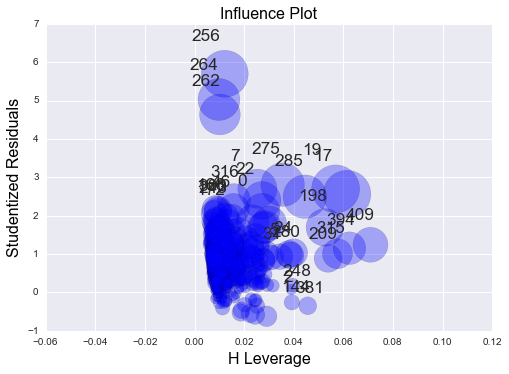

In [20]:
sm.graphics.influence_plot(result_OLS, plot_alpha=0.3)

In [23]:
idx_outlier = np.nonzero(result_OLS.outlier_test().ix[:, -1].abs() < 0.01)[0]
idx_outlier

array([256, 262, 264], dtype=int64)

In [24]:
x_scale_norm_drop = x_scale_norm.drop(idx_outlier)
y_drop = y.drop(idx_outlier) 
df2 = pd.concat([x_scale_norm_drop,y_drop],axis=1)

In [25]:
model_OLS_drop = sm.OLS(y_drop,x_scale_norm_drop) 
result_OLS_drop = model_OLS_drop.fit()
print(result_OLS_drop.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     27.83
Date:                Wed, 24 Feb 2016   Prob (F-statistic):           6.33e-28
Time:                        20:54:22   Log-Likelihood:                -3210.3
No. Observations:                 420   AIC:                             6433.
Df Residuals:                     414   BIC:                             6457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
seniorcenterratio  -152.1958     44.55

In [34]:
x_scale_norm_drop1 = x_scale_norm_drop.drop(labels=['movinginratio', 'disableratio','fireratio'],axis=1)
y_drop
df3 = pd.concat([x_scale_norm_drop1,y_drop],axis=1)

In [37]:
model_OLS_drop1 = sm.OLS(y_drop,x_scale_norm_drop1) 
result_OLS_drop1 = model_OLS_drop1.fit()
print(result_OLS_drop1.summary())

                            OLS Regression Results                            
Dep. Variable:                  older   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     55.92
Date:                Wed, 24 Feb 2016   Prob (F-statistic):           2.12e-30
Time:                        21:04:55   Log-Likelihood:                -3210.5
No. Observations:                 420   AIC:                             6427.
Df Residuals:                     417   BIC:                             6439.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
seniorcenterratio  -151.3074     44.30

In [38]:
from sklearn.svm import SVR

In [40]:
svr_sigmoid = SVR(kernel='linear')
print("SVR_linear model(score)  : ", svr_sigmoid.fit(x_scale_norm_drop1,y_drop).score(x_scale_norm_drop1,y_drop))

SVR_linear model(score)  :  -0.00497923991129


C:\Users\KC\Anaconda2\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


In [41]:
svr_sigmoid = SVR(kernel='poly')
print("SVR_poly model(score)    : ", svr_sigmoid.fit(x_scale_norm_drop1,y_drop).score(x_scale_norm_drop1,y_drop))

SVR_poly model(score)    :  -0.0377496515755


C:\Users\KC\Anaconda2\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


In [42]:
svr_sigmoid = SVR(kernel='sigmoid')
print("SVR_sigmoid model(score) : ", svr_sigmoid.fit(x_scale_norm_drop1,y_drop).score(x_scale_norm_drop1,y_drop))

SVR_sigmoid model(score) :  -0.0385204174347


C:\Users\KC\Anaconda2\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


In [43]:
svr_sigmoid = SVR(kernel='rbf')
print("SVR_rbf model(score)     : ", svr_sigmoid.fit(x_scale_norm_drop1,y_drop).score(x_scale_norm_drop1,y_drop))

SVR_rbf model(score)     :  -0.0189305990139


C:\Users\KC\Anaconda2\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


In [45]:
model_validation = LinearRegression()

In [46]:
cross_val_score(model_validation, x_scale_norm_drop1,y_drop)

array([ 0.14281427, -0.04021246, -0.11740305])